# Time Series Forecasting

#### Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. **I am going to predict temperature with time series forecasting using RNN method**

Time Series Forecasting using CNN-LSTM

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


import os


# Any results you write to the current directory are saved as output.

In [6]:
import tensorflow as tf

In [7]:
from tensorflow import keras

In [8]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [11]:
data = pd.read_csv('/Users/Asus/Documents/Atmel Studio/testset.csv')

In [12]:
data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [13]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [14]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])
data.set_index('datetime_utc', inplace= True)
data =data.resample('D').mean()

In [15]:
data = data[[' _tempm' ]]

In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    _tempm  7336 non-null   float64
dtypes: float64(1)
memory usage: 116.9 KB


In [17]:
from scipy.interpolate import interp1d

In [18]:
data[' _tempm'] = data[' _tempm'].interpolate()# we will fill the null row

In [19]:
data.head()

,_tempm
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000


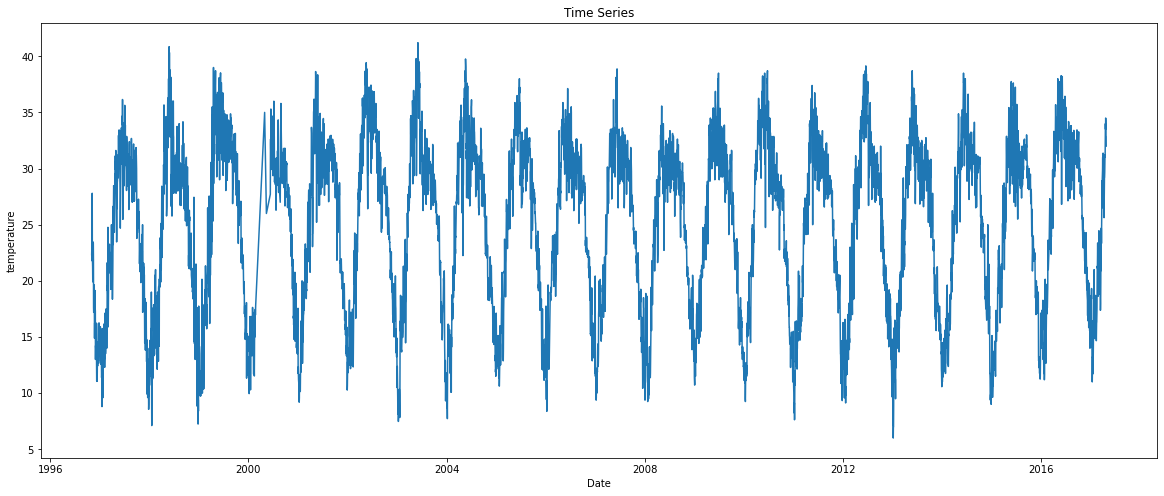

In [20]:
plt.figure(figsize=(20,8))
plt.plot(data)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

# Time Series Forecast using LSTM

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

In [21]:
data=data.values
data = data.astype('float32')

In [22]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(data)

In [23]:
timestep = 30

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 7300
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:] 

In [24]:
print(Xtrain.shape)
print(Xtest.shape)

(7300, 30, 1)
(150, 30, 1)


# CNN-LSTM Model

In [30]:
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [51]:
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
#model.fit(Xtrain,Ytrain,epochs=300, verbose=0 )

In [44]:
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [47]:
model

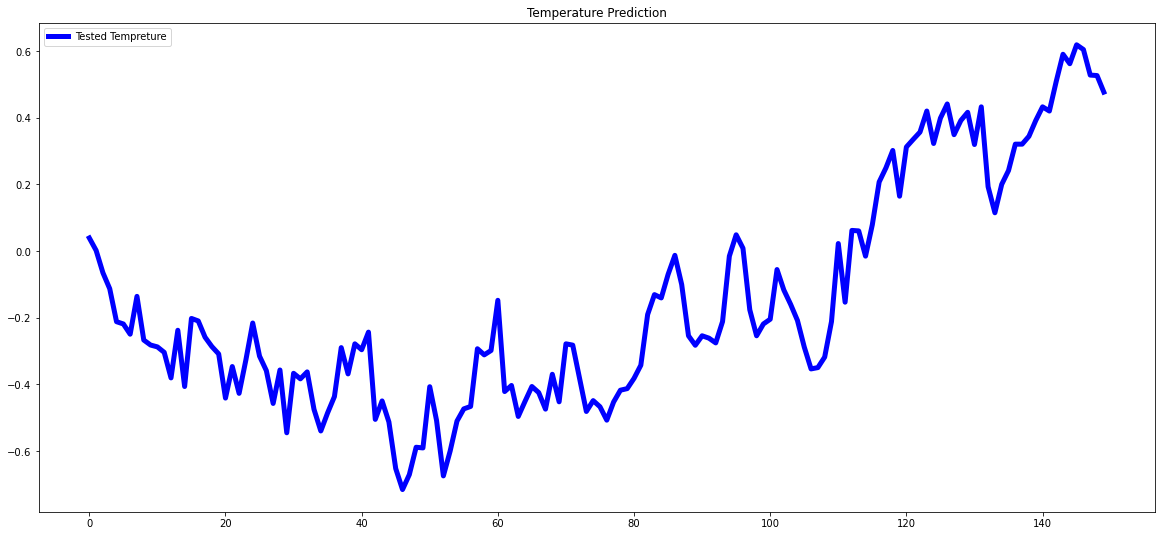

In [61]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
#plt.plot(preds,'r' , linewidth=4)
plt.legend(('Tested Tempreture','Predicted'))
plt.title("Temperature Prediction")
plt.show()

In [58]:
test = pd.DataFrame(Ytest,columns=['Actual'])
#pred = pd.DataFrame(preds,columns=['Predict'])

In [59]:
results = pd.concat([test],axis=1)

In [60]:
results.head(20)

,Actual
0,0.039128
1,0.001767
2,-0.065362
3,-0.113270
4,-0.212192
5,-0.218984
6,-0.249751
7,-0.136148
8,-0.267265
9,-0.282239
